In [1]:
# Ml modules 
import sklearn

# common modules imports
import numpy as np
import pandas as pd
# for visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# DATASET PATH
TRAIN_PATH = r'D:\jypyter notebooks\kaggle\Kidney Stone Prediction\train.csv'
TEST_PATH = r'D:\jypyter notebooks\kaggle\Kidney Stone Prediction\test.csv'
SAMPLE_SUB = r'D:\jypyter notebooks\kaggle\Kidney Stone Prediction\sample_submission.csv'

# Loading data

In [2]:
train_df = pd.read_csv(TRAIN_PATH, index_col = ['id'])
test_df = pd.read_csv(TEST_PATH, index_col = ['id'])
sample_sub_df = pd.read_csv(SAMPLE_SUB, index_col = ['id'])

In [3]:
features = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']
target_feature = ['target']

# Exploratory Data Analysis

## About The Data and features

To predict the presence of kidney stones based on urine analysis. the urine specimens, analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.

-  The `six physical` characteristics/`features` of the urine are:
    
    -  (1) `specific gravity`, the density of the urine relative to water. 
    -  (2) `pH`, the negative logarithm of the hydrogen ion.
    -  (3) `osmolarity (mOsm)`, a unit used in biology and medicine but not in physical chemistry. Osmolarity is  proportional to the concentration of molecules in solution.
    -  (4) `conductivity (mMho milliMho)`, One Mho is one reciprocal Ohm. Conductivity is proportional to the concentration of charged ions in solution.
    -  (5) `urea concentration in millimoles per litre.`
    -  (6) `calcium concentration (CALC) in millimolesllitre.`


# More information about features


- `Specific gravity` is a measure of the density of a substance compared to the density of water. 
In the context of urine and kidney stones, specific gravity is used as a diagnostic tool to evaluate the concentration of solutes in the urine.
When a person has kidney stones, the concentration of solutes in their urine can be high, leading to a higher specific gravity.
A specific gravity value above 1.020 is considered high and may indicate the presence of kidney stones or other urinary tract problems.
- `pH` of urine is a measure of its acidity or alkalinity. In the context of kidney stones, urine pH is an important factor as it can affect the formation of different types of kidney stones.
Most kidney stones are formed from calcium oxalate, which tends to form in acidic urine. Therefore, if the urine pH is too acidic (less than 5.5), it can increase the risk of calcium oxalate stone formation. On the other hand, if the urine pH is too alkaline (greater than 7.2), it can increase the risk of calcium phosphate stone formation.
Urinary tract infections (UTIs) can also affect urine pH. UTIs can increase the pH of urine, making it more alkaline, which can increase the risk of struvite stone formation.Therefore, measuring urine pH can be helpful in determining the type of kidney stone a person is likely to form and can help in devising preventive strategies.
- `Osmolarity` is a measure of the concentration of solutes in a solution. It can provide information about the concentration of solutes that can contribute to stone formation. High osmolarity in urine means that there are higher amounts of solutes, such as calcium, oxalate, and uric acid, which can lead to the formation of kidney stones. In contrast, low osmolarity indicates that the urine is more dilute and contains fewer solutes, which may reduce the risk of stone formation.
- `conductivity` of urine refers to the concentration of dissolved ions in the urine.conductivity can be used as a diagnostic tool to determine the presence of certain types of stones. For example, calcium-based stones tend to be highly conductive, while other types of stones, such as uric acid stones, are less conductive.
- `Urea` is a waste product that is produced by the liver during the breakdown of proteins and is excreted in the urine. measuring the concentration of urea in the urine can provide information about the solute concentration, which can contribute to the formation of kidney stones.High urea concentration in urine can indicate dehydration or a high protein diet, both of which can increase the risk of stone formation. However, low urea concentration may also indicate certain medical conditions, such as liver disease or low protein intake, which can affect the formation of kidney stones.
- `concentration of calcium` in the urine can provide information about the risk of stone formation.Most kidney stones are made up of calcium oxalate, and high levels of calcium in the urine can increase the risk of stone formation. However, low levels of calcium in the urine can also increase the risk of stone formation, as it can lead to an increase in oxalate levels, which can contribute to stone formation.<br>

In [4]:
# Taking a look at data
train_df.head(5)

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


In [5]:
train_df.isnull().any()

gravity    False
ph         False
osmo       False
cond       False
urea       False
calc       False
target     False
dtype: bool

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 25.9 KB


<span style="color:green">The data dosent contain any null value and all features are numeric </span>


In [7]:
train_df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [8]:
train_df[train_df.target==0].describe()

,gravity,ph,osmo,cond,urea,calc,target
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.0
mean,1.016209,6.009957,600.230435,20.281739,246.330435,2.771000,0.0
std,0.006853,0.669351,239.357973,8.214383,137.926613,2.485407,0.0
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.0
25%,1.010000,5.530000,416.000000,12.250000,133.000000,1.190000,0.0
50%,1.017000,5.860000,577.000000,21.400000,205.500000,2.160000,0.0
75%,1.021000,6.297500,779.000000,26.000000,358.500000,3.340000,0.0
max,1.040000,7.940000,1236.000000,38.000000,620.000000,13.000000,0.0


In [9]:
train_df[train_df.target==1].describe()

,gravity,ph,osmo,cond,urea,calc,target
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.0
mean,1.020000,5.887337,715.690217,22.883152,319.065217,5.794185,1.0
std,0.005809,0.601572,212.486494,6.263311,123.504811,3.245014,0.0
min,1.007000,4.810000,225.000000,5.100000,14.000000,0.170000,1.0
25%,1.017000,5.530000,543.000000,17.900000,214.000000,3.265000,1.0
50%,1.021000,5.680000,742.500000,23.600000,321.000000,5.540000,1.0
75%,1.024000,6.195000,874.000000,27.600000,396.500000,7.715000,1.0
max,1.040000,7.920000,1236.000000,38.000000,620.000000,14.340000,1.0


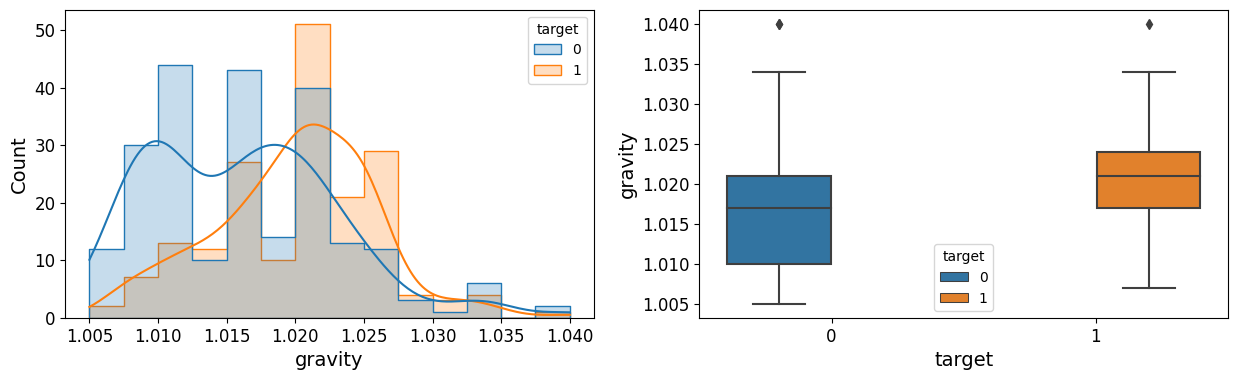

In [10]:
def plot_numerical_data(X,hue):
    fig, axes =plt.subplots(1, 2, figsize = (15,4))
    sns.histplot(ax = axes[0], x=X, hue=hue, data = train_df, element="step",kde=True)
    sns.boxplot(ax = axes[1], x=hue, y=X, hue=hue,data=train_df)

plot_numerical_data('gravity','target')

<span style="color:green">From density and box plot we can see  `specific gravity` after 1.020 shows increase in positives for kidney stones and drop in negatives which conclude that `heigh specefic gravity(above 1.020) can indicate persence of kidney stone but it alone can't say it surely`</span> 

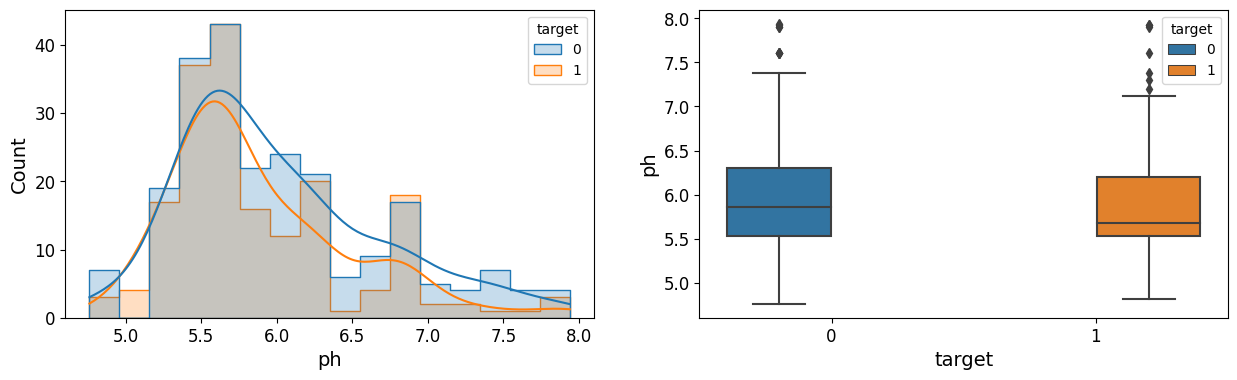

In [11]:
plot_numerical_data('ph','target')

In [12]:
def print_mean(col):
    df =train_df[col][train_df.target==0].describe()
    print("-ve mean & std:",train_df[col][train_df.target==0].mean(),"+-",train_df[col][train_df.target==0].std())
    print("+ve mean & std:",train_df[col][train_df.target==0].mean(),"+-",train_df[col][train_df.target==1].std())

print_mean('ph')

-ve mean & std: 6.00995652173913 +- 0.6693511802246995
+ve mean & std: 6.00995652173913 +- 0.6015716897109811


The distribution of both negitives and positives are simillar in this dataset
The `normal pH` of urine should ideally be `around 6.0 to 7.5` if the urine pH is `too acid` (`less than 5.5`) `or` if it is `too alkaline` `(greater than 7.2)` then there is a probability of kidney stones begin present

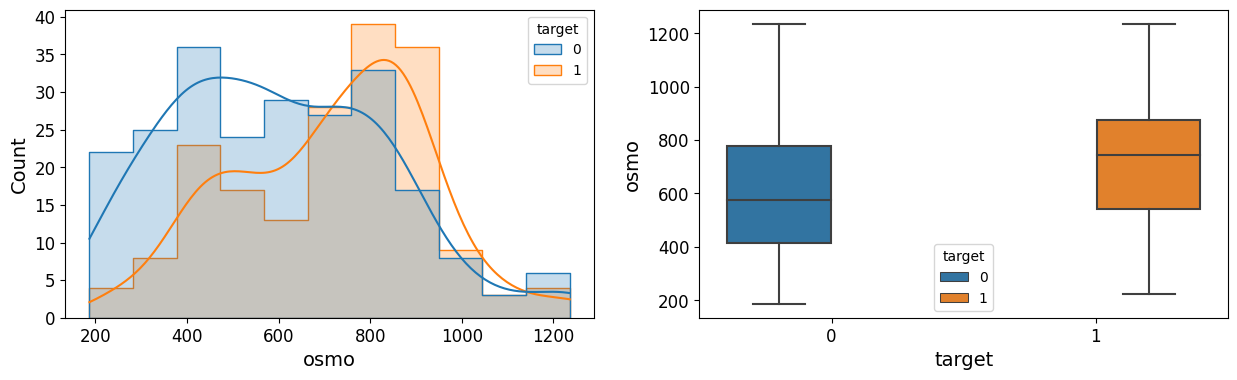

In [13]:
plot_numerical_data('osmo','target')

In [14]:
print_mean('osmo')

-ve mean & std: 600.2304347826087 +- 239.3579730118711
+ve mean & std: 600.2304347826087 +- 212.48649384775507


`Heigh Osmolarity` of above or around  800 can `indicate presence of kidney stones` whereas `low Osmolarity` `reduces the chances of kidney stones`

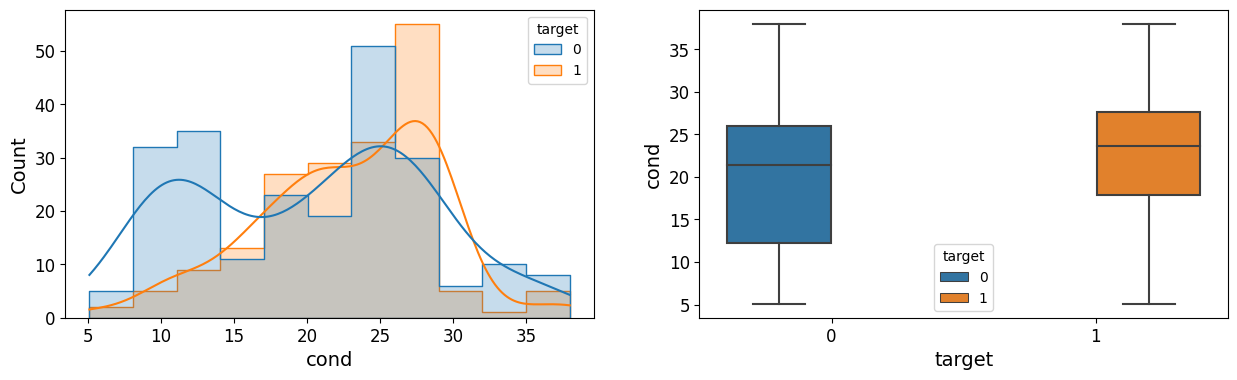

In [15]:
plot_numerical_data('cond','target')

low conductivty reduces the chances of kidney stones where as heigh conducvity can tells us presence of kidney stones 

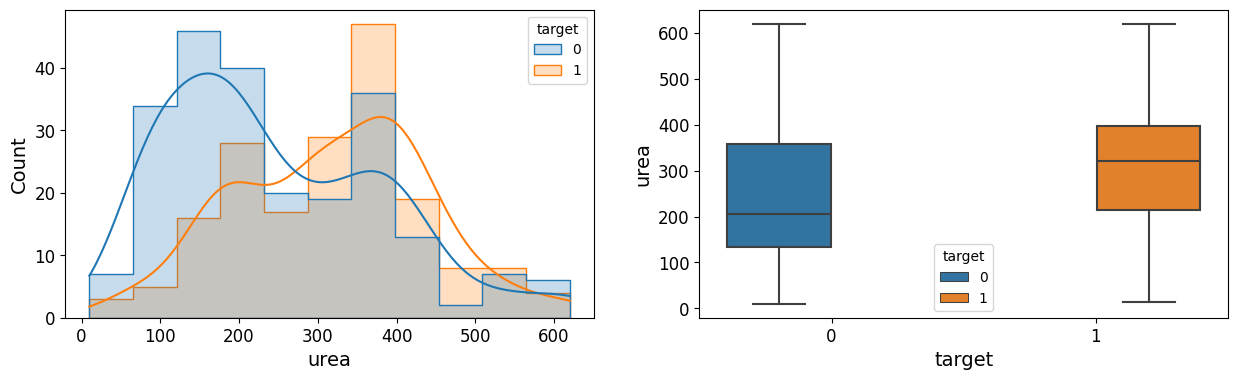

In [16]:
plot_numerical_data('urea','target')

In [17]:
print_mean('urea')

-ve mean & std: 246.3304347826087 +- 137.92661308849506
+ve mean & std: 246.3304347826087 +- 123.5048110253223


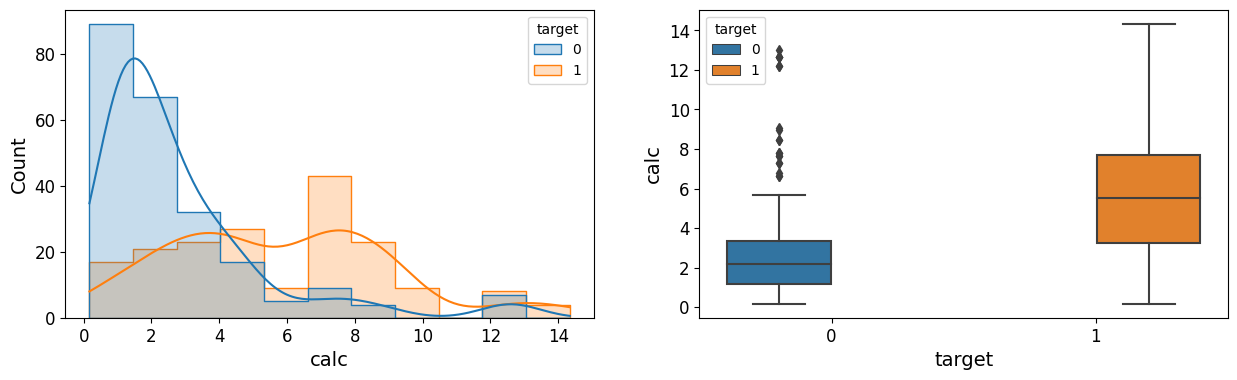

In [18]:
plot_numerical_data('calc','target')

In [19]:
print_mean('calc')

-ve mean & std: 2.7709999999999995 +- 2.4854074288406407
+ve mean & std: 2.7709999999999995 +- 3.2450135582137722


With `heigh concentration of calcium ` there is `more probability of kidney stones` begin present where as `low concentration of calcium reduces the risk of kidney stones`

# Correlation

<AxesSubplot: >

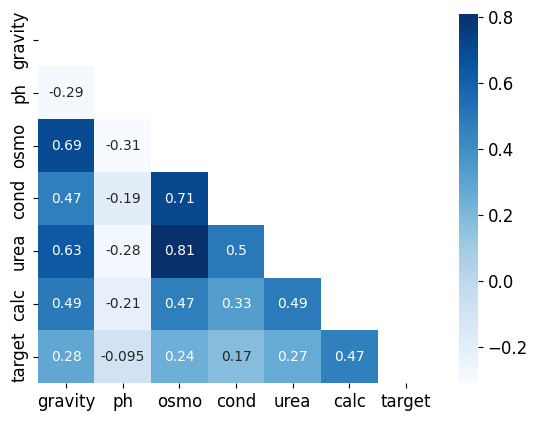

In [20]:
corr = train_df.corr(method='pearson')
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cmap = 'Blues', mask = matrix)

- osmo and urea shows very strong correlation 
- osmo:gravity and osmo & cond shows a pretty decent correlation. 
- Apart from all ph shows a negitive correaltion to target

In [21]:
# from https://www.kaggle.com/code/tetsutani/ps3e12-eda-ensemble-baseline?scriptVersionId=124746389&cellId=11

def create_new_features(data):
    # Ion product of calcium and urea
    data["ion_product"] = data["calc"] * data["urea"]

    # Calcium-to-urea ratio
    data["calcium_to_urea_ratio"] = data["calc"] / data["urea"]

    # Electrolyte balance
    data["electrolyte_balance"] = data["cond"] / (10 ** (-data["ph"]))

    # Osmolality-to-specific gravity ratio
    data["osmolality_to_sg_ratio"] = data["osmo"] / data["gravity"]
    
    ## Add Feature engineering part 
    # The product of osmolarity and density is created as a new property
    data['osmo_density'] = data['osmo'] * data['gravity']

        # Converting pH column to categorical variable
    data['pH_cat'] = pd.cut(data['ph'], bins=[0, 4.5, 6.5, 8.5, 14], labels=['sangat acidic', 'acidic', 'neutral', 'basic'])
    dummies = pd.get_dummies(data['pH_cat'])
    data = pd.concat([data, dummies], axis=1)
    
    # Deleting columns using dummy variables.
    data.drop(['pH_cat', 'sangat acidic' , 'basic','neutral','ph'], axis=1, inplace=True)
    
    return data

# Scaling and Model Training

In [22]:
tr = train_df.copy()
data = tr.drop(columns=['target'])
target = tr['target']

In [23]:
data = create_new_features(data)
data

,gravity,osmo,cond,urea,calc,ion_product,calcium_to_urea_ratio,electrolyte_balance,osmolality_to_sg_ratio,osmo_density,acidic
id,,,,,,,,,,,
0,1.013,443,14.8,124,1.45,179.80,0.011694,2.292249e+07,437.314906,448.759,1
1,1.025,703,23.6,394,4.18,1646.92,0.010609,5.928052e+06,685.853659,720.575,1
2,1.009,371,24.5,159,9.04,1437.36,0.056855,3.304959e+07,367.690783,374.339,1
3,1.021,442,20.8,398,6.63,2638.74,0.016658,1.690687e+06,432.908913,451.282,1
4,1.021,874,17.8,385,2.21,850.85,0.005740,6.031426e+06,856.023506,892.354,1
...,...,...,...,...,...,...,...,...,...,...,...
409,1.011,527,21.4,75,1.53,114.75,0.020400,3.470674e+06,521.266073,532.797,1
410,1.024,577,19.7,224,0.77,172.48,0.003438,6.675230e+06,563.476562,590.848,1
411,1.018,455,22.2,270,7.68,2073.60,0.028444,4.230123e+07,446.954813,463.190,1


In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import xgboost 
from sklearn.metrics import roc_auc_score
from colorama import Fore
from sklearn.metrics import confusion_matrix

data_pipline = Pipeline([
    ('scaler',StandardScaler())
])

X = data
Y = target

split = StratifiedKFold(random_state=42,shuffle=True)
Fold=0

In [25]:
from sklearn.linear_model import LogisticRegression

lg_train_score = []
lg_val_score = []
lg_model_list = []

for train_index, eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[eval_index], Y.iloc[eval_index]

    model = LogisticRegression()
    X_train_prepared = data_pipline.fit_transform(x_train)
    X_eval_prepared = data_pipline.fit_transform(x_eval)

    print(f'Fold :{Fold}')
    model.fit(X_train_prepared, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(X_train_prepared)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(X_eval_prepared)[:,1])

    lg_train_score.append(train_pred)
    lg_val_score.append(eval_pred)
    lg_model_list.append([data_pipline,model])
    print(f'Val roc AUC score: {Fore.BLUE} {eval_pred}')

print()
print(f'{Fore.BLACK} Mean Val roc scores : {Fore.GREEN}{np.mean(lg_val_score)}')


Fold :1
Val roc AUC score:  0.7056404230317275
Fold :2
Val roc AUC score:  0.7796709753231492
Fold :3
Val roc AUC score:  0.7461809635722679
Fold :4
Val roc AUC score:  0.8254994124559343
Fold :5
Val roc AUC score:  0.7934782608695652

 Mean Val roc scores : 0.7700940070505288


In [26]:
from sklearn.metrics import classification_report
pred = model.predict(X_eval_prepared)
print("confusion matrix :\n ",confusion_matrix(y_eval,pred))
print("roc auc score  : ",roc_auc_score(y_eval,model.predict_proba(X_eval_prepared)[:,1]))
print("classification report : \n",classification_report(y_eval,pred))

confusion matrix :
  [[38  8]
 [13 23]]
roc auc score  :  0.7934782608695652
classification report : 
               precision    recall  f1-score   support

           0       0.75      0.83      0.78        46
           1       0.74      0.64      0.69        36

    accuracy                           0.74        82
   macro avg       0.74      0.73      0.74        82
weighted avg       0.74      0.74      0.74        82



In [27]:
from sklearn.svm import SVC


svc_train_score = []
svc_val_score = []
svc_model_list = []
Fold=0
for train_index, eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[eval_index], Y.iloc[eval_index]

    model = SVC(probability=True)
    X_train_prepared = data_pipline.fit_transform(x_train)
    X_eval_prepared = data_pipline.fit_transform(x_eval)

    print(f'Fold :{Fold}')
    model.fit(X_train_prepared, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(X_train_prepared)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(X_eval_prepared)[:,1])

    svc_train_score.append(train_pred)
    svc_val_score.append(eval_pred)
    svc_model_list.append([data_pipline,model])
    print(f'{Fore.BLACK}Val roc AUC score: {Fore.BLUE} {eval_pred}')

print()
print(f'{Fore.BLACK}Mean Val roc scores : {Fore.GREEN}{np.mean(svc_val_score)}')

Fold :1
Val roc AUC score:  0.7168037602820212
Fold :2
Val roc AUC score:  0.8202115158636898
Fold :3
Val roc AUC score:  0.7972972972972974
Fold :4
Val roc AUC score:  0.8284371327849589
Fold :5
Val roc AUC score:  0.8016304347826086

Mean Val roc scores : 0.7928760282021152


In [28]:
from sklearn.metrics import classification_report
pred = model.predict(X_eval_prepared)
print("confusion matrix :\n ",confusion_matrix(y_eval,pred))
print("roc auc score  : ",roc_auc_score(y_eval,model.predict_proba(X_eval_prepared)[:,1]))
print("classification report : \n",classification_report(y_eval,pred))

confusion matrix :
  [[36 10]
 [12 24]]
roc auc score  :  0.8016304347826086
classification report : 
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        46
           1       0.71      0.67      0.69        36

    accuracy                           0.73        82
   macro avg       0.73      0.72      0.73        82
weighted avg       0.73      0.73      0.73        82



In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_train_score = []
rf_val_score = []
rf_model_list = []
Fold= 0
for train_index, eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[eval_index], Y.iloc[eval_index]

    model = RandomForestClassifier()
    X_train_prepared = data_pipline.fit_transform(x_train)
    X_eval_prepared = data_pipline.fit_transform(x_eval)

    print(f'Fold :{Fold}')
    model.fit(X_train_prepared, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(X_train_prepared)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(X_eval_prepared)[:,1])

    rf_train_score.append(train_pred)
    rf_val_score.append(eval_pred)
    rf_model_list.append([data_pipline,model])
    print(f'{Fore.BLACK} Val roc AUC score: {Fore.BLUE} {eval_pred}')

print()
print(f'{Fore.BLACK} Mean Val roc scores : {Fore.GREEN}{np.mean(rf_val_score)}')

Fold :1
 Val roc AUC score:  0.622502937720329
Fold :2
 Val roc AUC score:  0.7831962397179789
Fold :3
 Val roc AUC score:  0.8393066980023501
Fold :4
 Val roc AUC score:  0.7949471210340776
Fold :5
 Val roc AUC score:  0.7859299516908212

 Mean Val roc scores : 0.7651765896331113


In [30]:
from sklearn.metrics import classification_report
pred = model.predict(X_eval_prepared)
print("confusion matrix :\n ",confusion_matrix(y_eval,pred))
print("roc auc score  : ",roc_auc_score(y_eval,model.predict_proba(X_eval_prepared)[:,1]))
print("classification report : \n",classification_report(y_eval,pred))

confusion matrix :
  [[38  8]
 [11 25]]
roc auc score  :  0.7859299516908212
classification report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        46
           1       0.76      0.69      0.72        36

    accuracy                           0.77        82
   macro avg       0.77      0.76      0.76        82
weighted avg       0.77      0.77      0.77        82



In [31]:
from sklearn.ensemble import AdaBoostClassifier

ab_train_score = []
ab_val_score = []
ab_model_list = []
Fold= 0
for train_index, eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[eval_index], Y.iloc[eval_index]

    model = AdaBoostClassifier()
    X_train_prepared = data_pipline.fit_transform(x_train)
    X_eval_prepared = data_pipline.fit_transform(x_eval)

    print(f'Fold :{Fold}')
    model.fit(X_train_prepared, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(X_train_prepared)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(X_eval_prepared)[:,1])

    ab_train_score.append(train_pred)
    ab_val_score.append(eval_pred)
    ab_model_list.append([data_pipline,model])
    print(f'{Fore.BLACK} Val roc AUC score: {Fore.BLUE} {eval_pred}')

print()
print(f'{Fore.BLACK} Mean Val roc scores : {Fore.GREEN}{np.mean(ab_val_score)}')

Fold :1
 Val roc AUC score:  0.6883078730904817
Fold :2
 Val roc AUC score:  0.7881903642773209
Fold :3
 Val roc AUC score:  0.7558754406580493
Fold :4
 Val roc AUC score:  0.7144535840188014
Fold :5
 Val roc AUC score:  0.7415458937198068

 Mean Val roc scores : 0.7376746311528921


In [32]:
from sklearn.metrics import classification_report
pred = model.predict(X_eval_prepared)
print("confusion matrix :\n ",confusion_matrix(y_eval,pred))
print("roc auc score  : ",roc_auc_score(y_eval,model.predict_proba(X_eval_prepared)[:,1]))
print("classification report : \n",classification_report(y_eval,pred))

confusion matrix :
  [[34 12]
 [12 24]]
roc auc score  :  0.7415458937198068
classification report : 
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        46
           1       0.67      0.67      0.67        36

    accuracy                           0.71        82
   macro avg       0.70      0.70      0.70        82
weighted avg       0.71      0.71      0.71        82



In [33]:
import xgboost 

xg_train_score = []
xg_val_score = []
xg_model_list = []
Fold= 0
for train_index, eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[eval_index], Y.iloc[eval_index]

    model = xgboost.XGBClassifier()
    X_train_prepared = data_pipline.fit_transform(x_train)
    X_eval_prepared = data_pipline.fit_transform(x_eval)

    print(f'Fold :{Fold}')
    model.fit(X_train_prepared, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(X_train_prepared)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(X_eval_prepared)[:,1])

    xg_train_score.append(train_pred)
    xg_val_score.append(eval_pred)
    xg_model_list.append([data_pipline,model])
    print(f'{Fore.BLACK} Val roc AUC score: {Fore.BLUE} {eval_pred}')

print("---")
print(f'{Fore.BLACK} Mean Val roc scores : {Fore.GREEN}{np.mean(xg_val_score)}')

Fold :1
 Val roc AUC score:  0.5722679200940071
Fold :2
 Val roc AUC score:  0.745593419506463
Fold :3
 Val roc AUC score:  0.7761457109283196
Fold :4
 Val roc AUC score:  0.7755581668625147
Fold :5
 Val roc AUC score:  0.7355072463768115
---
 Mean Val roc scores : 0.7210144927536232


In [34]:
from sklearn.metrics import classification_report
pred = model.predict(X_eval_prepared)
print("confusion matrix :\n ",confusion_matrix(y_eval,pred))
print("roc auc score  : ",roc_auc_score(y_eval,model.predict_proba(X_eval_prepared)[:,1]))
print("classification report : \n",classification_report(y_eval,pred))

confusion matrix :
  [[34 12]
 [14 22]]
roc auc score  :  0.7355072463768115
classification report : 
               precision    recall  f1-score   support

           0       0.71      0.74      0.72        46
           1       0.65      0.61      0.63        36

    accuracy                           0.68        82
   macro avg       0.68      0.68      0.68        82
weighted avg       0.68      0.68      0.68        82



In [35]:
from sklearn.ensemble import VotingClassifier

classifiers = [('lr',lg_model_list[4][1]), ('svc',svc_model_list[4][1]), ('rf_clf',rf_model_list[4][1]), ('ada',ab_model_list[4][1]), ('xg',xg_model_list[4][1])]

vot_train_score = []
vot_val_score = []
vot_model_list = []
Fold= 0
for train_index, eval_index in (split.split(X,Y)):
    Fold = Fold+1
    x_train, y_train = X.iloc[train_index], Y.iloc[train_index]
    x_eval, y_eval = X.iloc[eval_index], Y.iloc[eval_index]

    model = voting_clf = VotingClassifier(
                                            estimators=classifiers,
                                            verbose=True,
                                            n_jobs=-1,
                                            voting='soft'
                                        )
    
    X_train_prepared = data_pipline.fit_transform(x_train)
    X_eval_prepared = data_pipline.fit_transform(x_eval)

    print(f'Fold :{Fold}')
    model.fit(X_train_prepared, y_train)
    train_pred = roc_auc_score(y_train, model.predict_proba(X_train_prepared)[:,1])
    eval_pred = roc_auc_score(y_eval, model.predict_proba(X_eval_prepared)[:,1])

    vot_train_score.append(train_pred)
    vot_val_score.append(eval_pred)
    vot_model_list.append([data_pipline,model])
    print(f'{Fore.BLACK} Val roc AUC score: {Fore.BLUE} {eval_pred}')

print("---")
print(f'{Fore.BLACK} Mean Val roc scores : {Fore.GREEN}{np.mean(vot_val_score)}')

Fold :1
 Val roc AUC score:  0.6756756756756758
Fold :2
 Val roc AUC score:  0.7867215041128084
Fold :3
 Val roc AUC score:  0.800235017626322
Fold :4
 Val roc AUC score:  0.8366627497062279
Fold :5
 Val roc AUC score:  0.7874396135265701
---
 Mean Val roc scores : 0.7773469121295208


In [36]:
from sklearn.metrics import classification_report
pred = model.predict(X_eval_prepared)
print("confusion matrix :\n ",confusion_matrix(y_eval,pred))
print("roc auc score  : ",roc_auc_score(y_eval,model.predict_proba(X_eval_prepared)[:,1]))
print("classification report : \n",classification_report(y_eval,pred))

confusion matrix :
  [[36 10]
 [12 24]]
roc auc score  :  0.7874396135265701
classification report : 
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        46
           1       0.71      0.67      0.69        36

    accuracy                           0.73        82
   macro avg       0.73      0.72      0.73        82
weighted avg       0.73      0.73      0.73        82



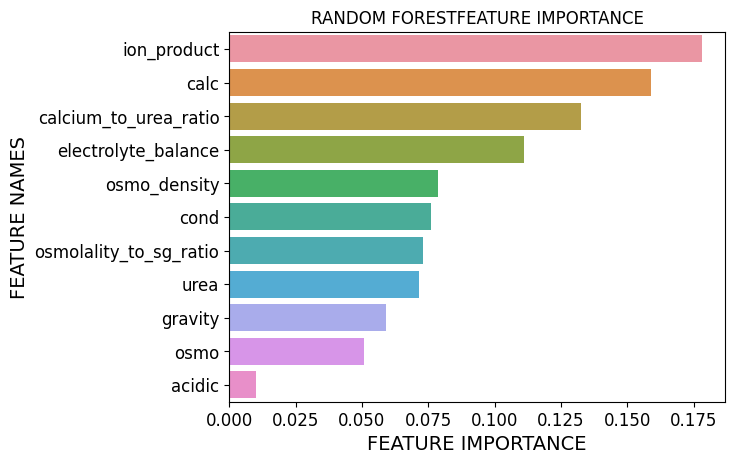

In [41]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    # plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(rf_model_list[4][1].feature_importances_,data.columns,'RANDOM FOREST')

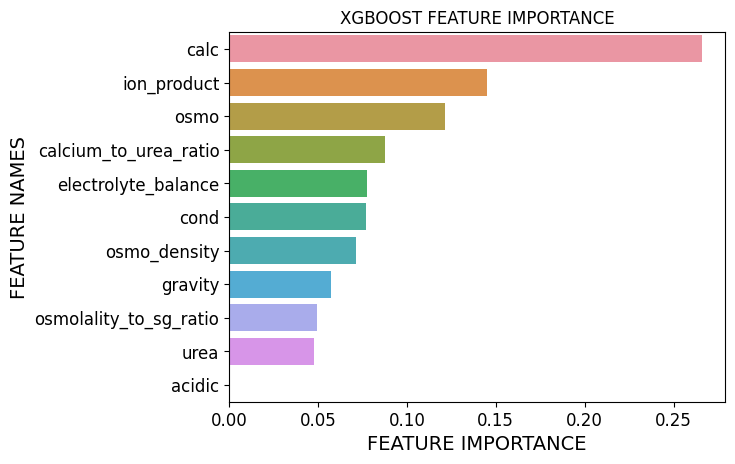

In [46]:
plot_feature_importance(xg_model_list[4][1].feature_importances_,data.columns,'XGBOOST ')


# Test Data Predictions and submission

In [38]:
# test_data = data_pipline.transform(test_df)

# sample_sub_df.target = vot_model_list[4][1].predict_proba(test_data)[0:,1]
# sample_sub_df.to_csv('submission.csv',index=False)